In [18]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/home/remo/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/remo/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [19]:
len(train_data)

8982

In [20]:
len(train_labels)

8982

In [21]:
train_data[100]

[1,
 367,
 1394,
 169,
 65,
 87,
 209,
 30,
 306,
 228,
 10,
 803,
 305,
 96,
 5,
 196,
 15,
 10,
 523,
 2,
 3006,
 293,
 484,
 2,
 1440,
 5825,
 8,
 145,
 7,
 10,
 1670,
 6,
 10,
 294,
 517,
 237,
 2,
 367,
 8042,
 7,
 2477,
 1177,
 483,
 1440,
 5825,
 8,
 367,
 1394,
 4,
 169,
 387,
 66,
 209,
 30,
 2344,
 652,
 1496,
 9,
 209,
 30,
 2564,
 228,
 10,
 803,
 305,
 96,
 5,
 196,
 15,
 51,
 36,
 1457,
 24,
 1345,
 5,
 4,
 196,
 150,
 10,
 523,
 320,
 64,
 992,
 6373,
 13,
 367,
 190,
 297,
 64,
 85,
 1692,
 6,
 8656,
 122,
 9,
 36,
 1457,
 24,
 269,
 4753,
 27,
 367,
 212,
 114,
 45,
 30,
 3292,
 7,
 126,
 2203,
 13,
 367,
 6,
 1818,
 4,
 169,
 65,
 96,
 28,
 432,
 23,
 189,
 1254,
 4,
 9725,
 320,
 5,
 196,
 15,
 10,
 523,
 25,
 730,
 190,
 57,
 64,
 6,
 9953,
 2016,
 6373,
 7,
 2,
 122,
 1440,
 5825,
 8,
 269,
 4753,
 1217,
 7,
 608,
 2203,
 30,
 3292,
 1440,
 5825,
 8,
 43,
 339,
 43,
 231,
 9,
 667,
 1820,
 126,
 212,
 4197,
 21,
 1709,
 249,
 311,
 13,
 260,
 489,
 9,
 65,
 4753,
 

In [22]:
# Decoding newswires back to text

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])

In [23]:
train_labels[10]

3

In [24]:
train_labels[20]

11

In [25]:
#Preparing(Encoding(Vectorize)) The Data

In [26]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [27]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [28]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [29]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 44ms/step - loss: 3.2334 - accuracy: 0.3615 - val_loss: 1.8903 - val_accuracy: 0.6290
Epoch 2/20
16/16 [==============================] - 1s 32ms/step - loss: 1.6364 - accuracy: 0.6832 - val_loss: 1.3670 - val_accuracy: 0.7100
Epoch 3/20
16/16 [==============================] - 1s 33ms/step - loss: 1.1842 - accuracy: 0.7534 - val_loss: 1.1701 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 1s 33ms/step - loss: 0.9074 - accuracy: 0.8083 - val_loss: 1.0653 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 1s 33ms/step - loss: 0.7138 - accuracy: 0.8514 - val_loss: 1.0089 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 1s 34ms/step - loss: 0.5911 - accuracy: 0.8752 - val_loss: 0.9365 - val_accuracy: 0.8170
Epoch 7/20
16/16 [==============================] - 1s 34ms/step - loss: 0.4603 - accuracy: 0.9047 - val_loss: 0.9340 - val_accuracy: 0.8150
Epoch 8/20
16

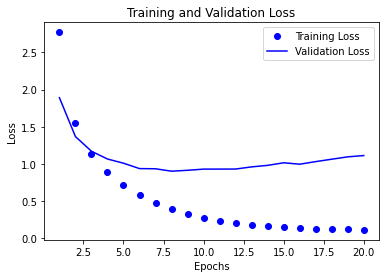

In [32]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

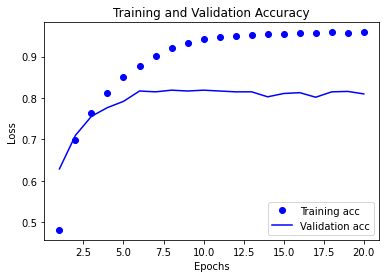

In [33]:
acc=history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [34]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 42ms/step - loss: 3.3107 - accuracy: 0.3525 - val_loss: 1.9982 - val_accuracy: 0.6720
Epoch 2/9
16/16 [==============================] - 1s 33ms/step - loss: 1.6691 - accuracy: 0.6997 - val_loss: 1.3817 - val_accuracy: 0.7080
Epoch 3/9
16/16 [==============================] - 1s 33ms/step - loss: 1.1311 - accuracy: 0.7624 - val_loss: 1.1510 - val_accuracy: 0.7620
Epoch 4/9
16/16 [==============================] - 1s 34ms/step - loss: 0.8591 - accuracy: 0.8124 - val_loss: 1.0453 - val_accuracy: 0.7790
Epoch 5/9
16/16 [==============================] - 1s 34ms/step - loss: 0.6841 - accuracy: 0.8576 - val_loss: 0.9873 - val_accuracy: 0.7970
Epoch 6/9
16/16 [==============================] - 1s 35ms/step - loss: 0.5345 - accuracy: 0.8918 - val_loss: 0.9703 - val_accuracy: 0.7980
Epoch 7/9
16/16 [==============================] - 1s 39ms/step - loss: 0.4184 - accuracy: 0.9167 - val_loss: 0.9054 - val_accuracy: 0.8190
Epoch 8/9
16/16 [===

In [35]:
results

[0.9991567134857178, 0.7827248573303223]

In [36]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18076580587711488

In [37]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [38]:
np.sum(predictions[0])

0.99999994

In [39]:
np.argmax(predictions[0])

3

In [40]:
# A model with an information bottleneck

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 16ms/step - loss: 3.3899 - accuracy: 0.3776 - val_loss: 2.5419 - val_accuracy: 0.5190
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 2.3515 - accuracy: 0.5101 - val_loss: 2.2255 - val_accuracy: 0.4670
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 1.9974 - accuracy: 0.4922 - val_loss: 2.0637 - val_accuracy: 0.4640
Epoch 4/20
63/63 [==============================] - 1s 14ms/step - loss: 1.7692 - accuracy: 0.5017 - val_loss: 1.7053 - val_accuracy: 0.6120
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 1.3008 - accuracy: 0.7005 - val_loss: 1.4246 - val_accuracy: 0.6740
Epoch 6/20
63/63 [==============================] - 1s 15ms/step - loss: 1.0304 - accuracy: 0.7489 - val_loss: 1.3562 - val_accuracy: 0.7000
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 0.9373 - accuracy: 0.7592 - val_loss: 1.3707 - val_accuracy: 0.7020
Epoch 8/20
63

In [41]:
# A model with an information bottleneck

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 16ms/step - loss: 2.5928 - accuracy: 0.4893 - val_loss: 1.3404 - val_accuracy: 0.7240
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0858 - accuracy: 0.7672 - val_loss: 1.1053 - val_accuracy: 0.7630
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 0.7551 - accuracy: 0.8410 - val_loss: 0.9716 - val_accuracy: 0.7980
Epoch 4/20
63/63 [==============================] - 1s 14ms/step - loss: 0.5414 - accuracy: 0.8892 - val_loss: 0.9170 - val_accuracy: 0.8110
Epoch 5/20
63/63 [==============================] - 1s 15ms/step - loss: 0.3941 - accuracy: 0.9180 - val_loss: 0.8865 - val_accuracy: 0.8130
Epoch 6/20
63/63 [==============================] - 1s 16ms/step - loss: 0.3015 - accuracy: 0.9344 - val_loss: 0.9400 - val_accuracy: 0.8070
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 0.2301 - accuracy: 0.9495 - val_loss: 0.9541 - val_accuracy: 0.8180
Epoch 8/20
63

In [42]:
# A model with an information bottleneck

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(96, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 16ms/step - loss: 2.3192 - accuracy: 0.5466 - val_loss: 1.1749 - val_accuracy: 0.7410
Epoch 2/20
63/63 [==============================] - 1s 15ms/step - loss: 0.9677 - accuracy: 0.7878 - val_loss: 0.9675 - val_accuracy: 0.7950
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 0.6395 - accuracy: 0.8652 - val_loss: 0.9034 - val_accuracy: 0.8040
Epoch 4/20
63/63 [==============================] - 1s 15ms/step - loss: 0.3959 - accuracy: 0.9157 - val_loss: 0.8572 - val_accuracy: 0.8190
Epoch 5/20
63/63 [==============================] - 1s 15ms/step - loss: 0.2766 - accuracy: 0.9377 - val_loss: 0.9061 - val_accuracy: 0.8170
Epoch 6/20
63/63 [==============================] - 1s 15ms/step - loss: 0.2180 - accuracy: 0.9495 - val_loss: 0.9591 - val_accuracy: 0.8030
Epoch 7/20
63/63 [==============================] - 1s 15ms/step - loss: 0.1744 - accuracy: 0.9557 - val_loss: 1.0050 - val_accuracy: 0.8030
Epoch 8/20
63

In [43]:
# A model with an information bottleneck

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 16ms/step - loss: 2.2988 - accuracy: 0.5241 - val_loss: 1.1900 - val_accuracy: 0.7150
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 0.9392 - accuracy: 0.7886 - val_loss: 0.9596 - val_accuracy: 0.8070
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 0.6291 - accuracy: 0.8614 - val_loss: 0.8923 - val_accuracy: 0.8110
Epoch 4/20
63/63 [==============================] - 1s 14ms/step - loss: 0.3927 - accuracy: 0.9136 - val_loss: 0.8659 - val_accuracy: 0.8300
Epoch 5/20
63/63 [==============================] - 1s 15ms/step - loss: 0.2757 - accuracy: 0.9384 - val_loss: 0.8959 - val_accuracy: 0.8170
Epoch 6/20
63/63 [==============================] - 1s 14ms/step - loss: 0.2085 - accuracy: 0.9506 - val_loss: 0.9824 - val_accuracy: 0.8140
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 0.1754 - accuracy: 0.9546 - val_loss: 1.0048 - val_accuracy: 0.8080
Epoch 8/20
63